<a href="https://colab.research.google.com/github/ricefield139/object_detect/blob/main/training_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fiftyone

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset_cat = fo.zoo.load_zoo_dataset(
              "open-images-v6",
              split="validation",
              dataset_name="test_cat",
              label_types=["detections", "segmentations"],
              classes=["Cat"],
              max_samples=50,
          )

Existing download of split 'validation' is sufficient
Loading existing dataset 'test_cat'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [ ]:
session = fo.launch_app(dataset_cat)


In [ ]:
dataset_dog = fo.zoo.load_zoo_dataset(
              "open-images-v6",
              split="validation",
              dataset_name="test_dog",
              label_types=["detections", "segmentations"],
              classes=["Dog"],
              max_samples=50,
          )

Existing download of split 'validation' is sufficient
Loading existing dataset 'test_dog'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [ ]:
session = fo.launch_app(dataset_dog)


In [ ]:
dataset_dog

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
!pip install opencv-python

In [ ]:
DATA_DIR=os.getcwd() + '/../root/fiftyone/open-images-v6/validation/data'
CATEGORIES =['Cat','Dog']

In [ ]:
DATA_DIR

'/content/../root/fiftyone/open-images-v6/validation/data'

In [ ]:
for img in os.listdir(DATA_DIR):
  img_array = cv2.imread(os.path.join(DATA_DIR,img), cv2.IMREAD_GRAYSCALE)
  plt.imshow(img_array,cmap="gray")
  plt.show()



In [ ]:
#separate the dataset
import shutil
TARGET_DIR="/content/"
os.mkdir(os.path.join(TARGET_DIR, "train"))
TEST_CAT_DIR=os.path.join(TARGET_DIR, "train", dataset_cat.name)
TEST_DOG_DIR=os.path.join(TARGET_DIR, "train", dataset_dog.name)
print(TEST_CAT_DIR)
print(TEST_DOG_DIR)
os.mkdir(TEST_CAT_DIR)
os.mkdir(TEST_DOG_DIR)

/content/train/test_cat
/content/train/test_dog


In [ ]:
for sample in dataset_cat:
  shutil.copy(sample.filepath, TEST_CAT_DIR)

In [ ]:
for sample in dataset_dog:
  shutil.copy(sample.filepath, TEST_DOG_DIR)

In [134]:
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = os.path.join(TARGET_DIR, "train")

BATCH_SIZE = 9
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 100 files belonging to 2 classes.


['cat', 'dog']


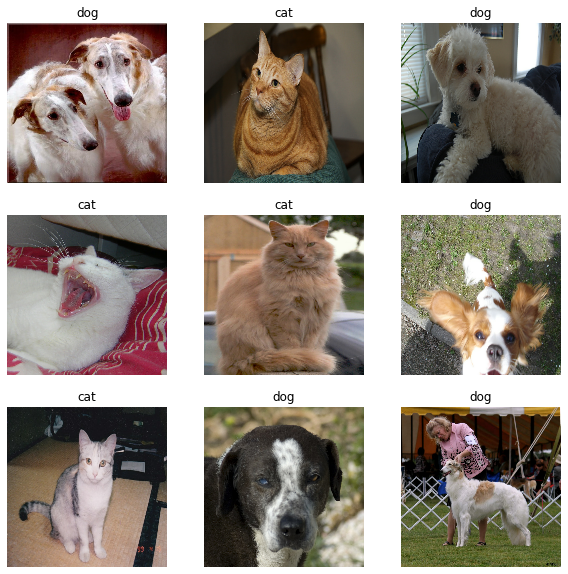

In [135]:
class_names = train_dataset.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
#make validation dir
os.mkdir(os.path.join(TARGET_DIR, "validation"))
validation_dir = os.path.join(TARGET_DIR, "validation")


In [ ]:
#THIS IS NOT A GOOD WAY TO CREATE VALID
dataset_cat_valid = fo.zoo.load_zoo_dataset(
              "open-images-v6",
              split="validation",
              dataset_name="valid_cat",
              label_types=["detections", "segmentations"],
              classes=["Cat"],
              max_samples=20,
          )
dataset_dog_valid = fo.zoo.load_zoo_dataset(
              "open-images-v6",
              split="validation",
              dataset_name="valid_dog",
              label_types=["detections", "segmentations"],
              classes=["Dog"],
              max_samples=20,
          )

VALID_CAT_DIR=os.path.join(TARGET_DIR, "validation", dataset_cat_valid.name)
VALID_DOG_DIR=os.path.join(TARGET_DIR, "validation", dataset_dog_valid.name)
print(VALID_CAT_DIR)
print(VALID_DOG_DIR)
os.mkdir(VALID_CAT_DIR)
os.mkdir(VALID_DOG_DIR)
for sample in dataset_cat_valid:
  shutil.copy(sample.filepath, VALID_CAT_DIR)
for sample in dataset_dog_valid:
  shutil.copy(sample.filepath, VALID_DOG_DIR)

Existing download of split 'validation' is sufficient
Loading existing dataset 'valid_cat'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
Existing download of split 'validation' is sufficient
Loading existing dataset 'valid_dog'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
/content/validation/valid_cat
/content/validation/valid_dog


In [129]:
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 40 files belonging to 2 classes.


In [142]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')